In [1]:
import utils
from ast import literal_eval
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('emg_dataset.csv')
df['signal'] = df['signal'].apply(lambda x: list(map(int, literal_eval(x))))
df = df.drop(['Height', 'Weight', 'Age', 'Gender', 'TimeStamp'], axis = 1)
df = df[df['Muscule'].isin([3, 15, 38, 42])]

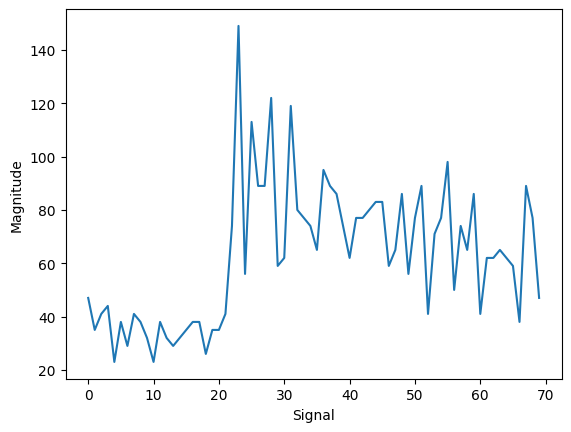

In [3]:
utils.plot_signal(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


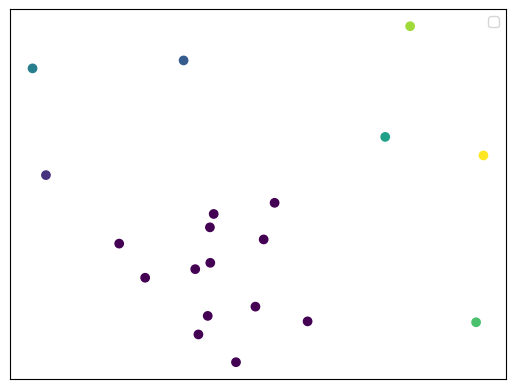

1623


In [4]:
df['signal'] = df['signal'].apply(utils.interpolate_signal)

df['signal'] = df['signal'].apply(utils.rescale_signal)

view_df = df[(df['Muscule'] == 3) & (df['Movement'] == 24)]
utils.visualize_clustering(view_df)

parts = []
for musc in df['Muscule'].unique():
    for move in df['Movement'].unique():
        temp = df[(df['Muscule'] == musc) & (df['Movement'] == move)]
        temp = utils.DBSCAN_filtering(temp)
        parts.append(temp)
df = pd.concat(parts)
print(len(df))

good_df = utils.tall_to_wide_bootstrap(df, n_samples=20, mutate=False)

In [5]:
from pycaret.classification import *
session = setup(good_df, target='move', session_id=123, preprocess=False, fold=5)
compare_models(exclude=['et', 'gbc', 'catboost', 'xgboost'])

,Description,Value
0,Session id,123
1,Target,move
2,Target type,Multiclass
3,Original data shape,"(460, 17)"
4,Transformed data shape,"(460, 17)"
5,Transformed train set shape,"(322, 17)"
6,Transformed test set shape,"(138, 17)"
7,Numeric features,16


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9222,0.9989,0.9222,0.9335,0.9174,0.9186,0.9196,0.2480
nb,Naive Bayes,0.9128,0.9958,0.9128,0.9344,0.9102,0.9088,0.9100,0.1660
lda,Linear Discriminant Analysis,0.9004,0.9980,0.9004,0.9196,0.8936,0.8958,0.8973,0.0120
lightgbm,Light Gradient Boosting Machine,0.8943,0.9968,0.8943,0.9243,0.8912,0.8894,0.8911,0.1560
dt,Decision Tree Classifier,0.8321,0.9123,0.8321,0.8596,0.8241,0.8243,0.8264,0.1660
ridge,Ridge Classifier,0.6177,0.0000,0.6177,0.6407,0.5844,0.6002,0.6059,0.1640
lr,Logistic Regression,0.5153,0.9239,0.5153,0.5398,0.4920,0.4934,0.4973,0.2260
knn,K Neighbors Classifier,0.3478,0.7957,0.3478,0.3311,0.3079,0.3181,0.3222,0.1760
svm,SVM - Linear Kernel,0.3415,0.0000,0.3415,0.2749,0.2735,0.3114,0.3206,0.1680
qda,Quadratic Discriminant Analysis,0.2765,0.6214,0.2765,0.2683,0.2485,0.2429,0.2463,0.0140


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [6]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9077,0.9990,0.9077,0.9397,0.9038,0.9035,0.9053
1,0.9231,0.9993,0.9231,0.9469,0.9169,0.9195,0.9211
2,0.8438,0.9980,0.8438,0.8883,0.8434,0.8366,0.8392
3,0.8594,0.9926,0.8594,0.8974,0.8569,0.8528,0.8547
4,0.9375,0.9954,0.9375,0.9492,0.9351,0.9346,0.9353
Mean,0.8943,0.9968,0.8943,0.9243,0.8912,0.8894,0.8911
Std,0.0365,0.0025,0.0365,0.0260,0.0352,0.0381,0.0376


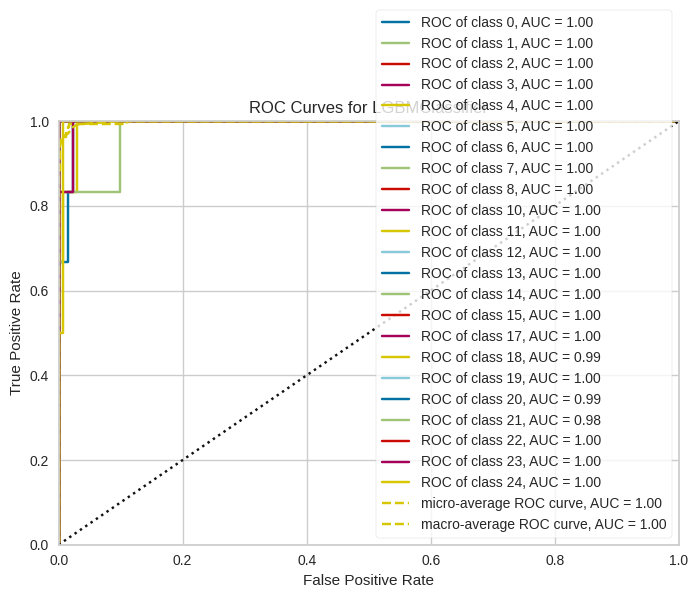

In [7]:
plot_model(model, 'auc')

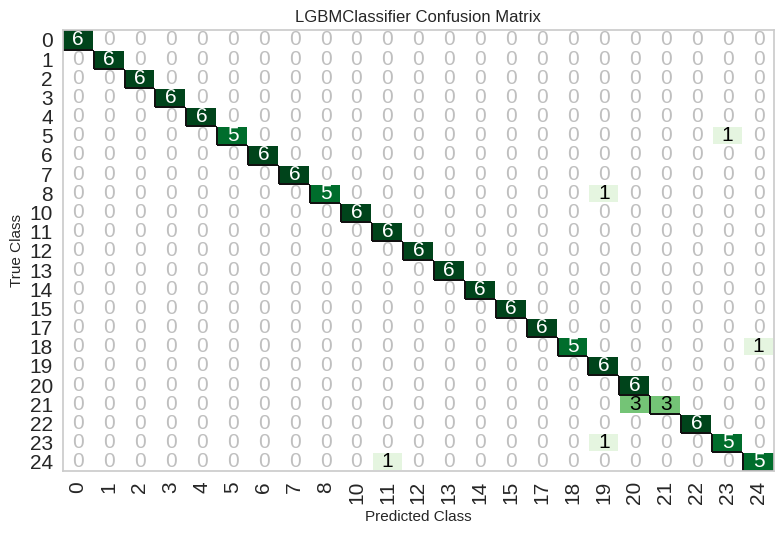

In [10]:
plot_model(model, 'confusion_matrix')

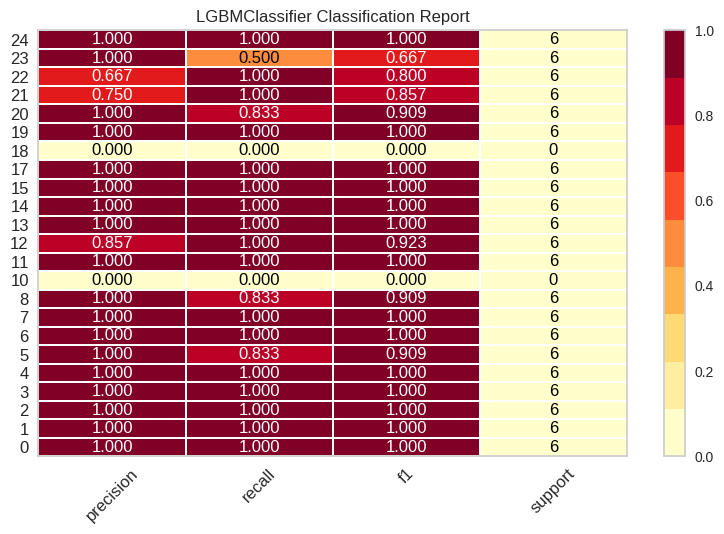

In [12]:
plot_model(model, 'class_report')

In [13]:
final_model = finalize_model(model)